# 5년 간 음식점 개업 수, 폐업 수 추출 

In [6]:
import pandas as pd

In [7]:
food_health = pd.read_csv('../data/food_health.csv', encoding='cp949')

In [8]:
food_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288535 entries, 0 to 288534
Data columns (total 48 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   번호           288535 non-null  int64  
 1   개방서비스명       288535 non-null  object 
 2   개방서비스id      288535 non-null  object 
 3   개방자치단체코드     288535 non-null  int64  
 4   관리번호         288535 non-null  object 
 5   인허가일자        288535 non-null  int64  
 6   인허가취소일자      0 non-null       float64
 7   영업상태구분코드     288535 non-null  int64  
 8   영업상태명        288535 non-null  object 
 9   상세영업상태코드     288535 non-null  int64  
 10  상세영업상태명      288535 non-null  object 
 11  폐업일자         190217 non-null  float64
 12  휴업시작일자       0 non-null       float64
 13  휴업종료일자       0 non-null       float64
 14  재개업일자        0 non-null       float64
 15  소재지전화        142953 non-null  object 
 16  소재지면적        133247 non-null  object 
 17  소재지우편번호      277710 non-null  float64
 18  소재지전체주소      287116 non-

In [9]:
food_health['인허가일자']

0         20040511
1         20040515
2         20110601
3         20110128
4         20110217
            ...   
288530    20210115
288531    20210115
288532    20210125
288533    20210201
288534    20191101
Name: 인허가일자, Length: 288535, dtype: int64

### 16~21(5년치 데이터)
## 1. 월별 개업 수 변화

In [10]:
food_health = food_health[food_health['인허가일자'] >= 20160101]

In [11]:
food_health['인허가일자'].max()

20210630

- 코로나 발생 시기 이후부터 '영업'인 지점 찾기

In [12]:
food_health_opening = food_health[food_health['상세영업상태명'] =='영업']

In [13]:
food_health_opening

,번호,개방서비스명,개방서비스id,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태구분코드,영업상태명,상세영업상태코드,...,공장생산직종업원수,건물소유구분명,보증액,월세액,다중이용업소여부,시설총규모,전통업소지정번호,전통업소주된음식,홈페이지,Unnamed: 47
25,26,건강기능식품일반판매업,07_22_03_P,3590000,3590000-134-2017-00032,20170926,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,N,0.0,NaN,NaN,NaN,NaN
26,27,건강기능식품일반판매업,07_22_03_P,3590000,3590000-134-2017-00034,20171023,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,N,0.0,NaN,NaN,NaN,NaN
27,28,건강기능식품일반판매업,07_22_03_P,3590000,3590000-134-2017-00003,20170111,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,N,0.0,NaN,NaN,NaN,NaN
28,29,건강기능식품일반판매업,07_22_03_P,3590000,3590000-134-2017-00005,20170207,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,N,0.0,NaN,NaN,NaN,NaN
29,30,건강기능식품일반판매업,07_22_03_P,3590000,3590000-134-2017-00007,20170308,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,N,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98313,98314,건강기능식품일반판매업,07_22_03_P,3720000,3720000-134-2021-00007,20210115,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,N,0.0,NaN,NaN,NaN,NaN
98314,98315,건강기능식품일반판매업,07_22_03_P,3720000,3720000-134-2021-00008,20210115,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,N,0.0,NaN,NaN,NaN,NaN
98315,98316,건강기능식품일반판매업,07_22_03_P,3590000,3590000-134-2021-00003,20210115,NaN,1,영업/정상,1,...,NaN,임대,NaN,NaN,N,0.0,NaN,NaN,NaN,NaN
98316,98317,건강기능식품일반판매업,07_22_03_P,3100000,3100000-134-2021-00019,20210114,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,N,0.0,NaN,NaN,NaN,NaN


In [14]:
food_health_opening.index = pd.to_datetime(food_health_opening['인허가일자'], format='%Y%m%d')
food_health_opening.dtypes

번호               int64
개방서비스명          object
개방서비스id         object
개방자치단체코드         int64
관리번호            object
인허가일자            int64
인허가취소일자        float64
영업상태구분코드         int64
영업상태명           object
상세영업상태코드         int64
상세영업상태명         object
폐업일자           float64
휴업시작일자         float64
휴업종료일자         float64
재개업일자          float64
소재지전화           object
소재지면적           object
소재지우편번호        float64
소재지전체주소         object
도로명전체주소         object
도로명우편번호        float64
사업장명            object
최종수정시점           int64
데이터갱신구분         object
데이터갱신일자         object
업태구분명          float64
좌표정보(x)        float64
좌표정보(y)        float64
위생업태명           object
남성종사자수         float64
여성종사자수         float64
영업장주변구분명       float64
등급구분명          float64
급수시설구분명         object
총종업원수          float64
본사종업원수         float64
공장사무직종업원수      float64
공장판매직종업원수      float64
공장생산직종업원수      float64
건물소유구분명         object
보증액            float64
월세액            float64
다중이용업소여부        object
시설총규모      

In [15]:
food_health_opening

,번호,개방서비스명,개방서비스id,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태구분코드,영업상태명,상세영업상태코드,...,공장생산직종업원수,건물소유구분명,보증액,월세액,다중이용업소여부,시설총규모,전통업소지정번호,전통업소주된음식,홈페이지,Unnamed: 47
인허가일자,,,,,,,,,,,,,,,,,,,,,
2017-09-26,26,건강기능식품일반판매업,07_22_03_P,3590000,3590000-134-2017-00032,20170926,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,N,0.0,NaN,NaN,NaN,NaN
2017-10-23,27,건강기능식품일반판매업,07_22_03_P,3590000,3590000-134-2017-00034,20171023,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,N,0.0,NaN,NaN,NaN,NaN
2017-01-11,28,건강기능식품일반판매업,07_22_03_P,3590000,3590000-134-2017-00003,20170111,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,N,0.0,NaN,NaN,NaN,NaN
2017-02-07,29,건강기능식품일반판매업,07_22_03_P,3590000,3590000-134-2017-00005,20170207,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,N,0.0,NaN,NaN,NaN,NaN
2017-03-08,30,건강기능식품일반판매업,07_22_03_P,3590000,3590000-134-2017-00007,20170308,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,N,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-15,98314,건강기능식품일반판매업,07_22_03_P,3720000,3720000-134-2021-00007,20210115,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,N,0.0,NaN,NaN,NaN,NaN
2021-01-15,98315,건강기능식품일반판매업,07_22_03_P,3720000,3720000-134-2021-00008,20210115,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,N,0.0,NaN,NaN,NaN,NaN
2021-01-15,98316,건강기능식품일반판매업,07_22_03_P,3590000,3590000-134-2021-00003,20210115,NaN,1,영업/정상,1,...,NaN,임대,NaN,NaN,N,0.0,NaN,NaN,NaN,NaN


In [16]:
weekly_df = food_health_opening['상세영업상태명'].resample('M').count()
weekly_df

인허가일자
2016-01-31     333
2016-02-29     316
2016-03-31     331
2016-04-30     337
2016-05-31     359
              ... 
2021-02-28    2756
2021-03-31    2484
2021-04-30    2110
2021-05-31    1662
2021-06-30    1813
Freq: M, Name: 상세영업상태명, Length: 66, dtype: int64

In [17]:
weekly_df.index

DatetimeIndex(['2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31',
               '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31',
               '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31',
               '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31',
               '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
      

In [18]:
weekly_df = weekly_df.rename_axis('opening')

<AxesSubplot:xlabel='opening'>

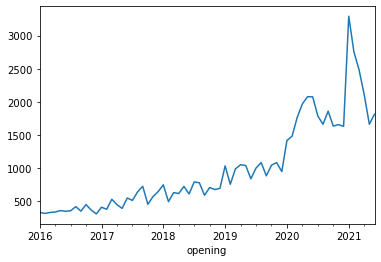

In [19]:
import matplotlib as plt
weekly_df.plot()

## 폐업 수

In [20]:
food_health_closing = food_health[food_health['상세영업상태명'] =='폐업']

In [21]:
food_health_closing

,번호,개방서비스명,개방서비스id,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태구분코드,영업상태명,상세영업상태코드,...,공장생산직종업원수,건물소유구분명,보증액,월세액,다중이용업소여부,시설총규모,전통업소지정번호,전통업소주된음식,홈페이지,Unnamed: 47
98560,98561,건강기능식품일반판매업,07_22_03_P,3590000,3590000-134-2017-00004,20170117,NaN,3,폐업,2,...,NaN,NaN,NaN,NaN,N,0.0,NaN,NaN,NaN,NaN
98561,98562,건강기능식품일반판매업,07_22_03_P,3590000,3590000-134-2017-00006,20170222,NaN,3,폐업,2,...,NaN,NaN,NaN,NaN,N,0.0,NaN,NaN,NaN,NaN
98562,98563,건강기능식품일반판매업,07_22_03_P,3590000,3590000-134-2017-00008,20170314,NaN,3,폐업,2,...,NaN,자가,NaN,NaN,N,0.0,NaN,NaN,NaN,NaN
98563,98564,건강기능식품일반판매업,07_22_03_P,3590000,3590000-134-2017-00009,20170323,NaN,3,폐업,2,...,NaN,자가,NaN,NaN,N,0.0,NaN,NaN,NaN,NaN
98564,98565,건강기능식품일반판매업,07_22_03_P,3590000,3590000-134-2017-00010,20170327,NaN,3,폐업,2,...,NaN,NaN,NaN,NaN,N,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288530,288531,건강기능식품일반판매업,07_22_03_P,3130000,3130000-134-2021-00016,20210115,NaN,3,폐업,2,...,NaN,NaN,NaN,NaN,N,0.0,NaN,NaN,NaN,NaN
288531,288532,건강기능식품일반판매업,07_22_03_P,3210000,3210000-134-2021-00039,20210115,NaN,3,폐업,2,...,NaN,NaN,NaN,NaN,N,0.0,NaN,NaN,NaN,NaN
288532,288533,건강기능식품일반판매업,07_22_03_P,3820000,3820000-134-2021-00026,20210125,NaN,3,폐업,2,...,NaN,NaN,NaN,NaN,N,0.0,NaN,NaN,NaN,NaN
288533,288534,건강기능식품일반판매업,07_22_03_P,3560000,3560000-134-2021-00036,20210201,NaN,3,폐업,2,...,NaN,자가,NaN,NaN,N,3.3,NaN,NaN,NaN,NaN


In [22]:
food_health_closing.index = pd.to_datetime(food_health_closing['폐업일자'], format='%Y%m%d')
food_health_closing.dtypes

번호               int64
개방서비스명          object
개방서비스id         object
개방자치단체코드         int64
관리번호            object
인허가일자            int64
인허가취소일자        float64
영업상태구분코드         int64
영업상태명           object
상세영업상태코드         int64
상세영업상태명         object
폐업일자           float64
휴업시작일자         float64
휴업종료일자         float64
재개업일자          float64
소재지전화           object
소재지면적           object
소재지우편번호        float64
소재지전체주소         object
도로명전체주소         object
도로명우편번호        float64
사업장명            object
최종수정시점           int64
데이터갱신구분         object
데이터갱신일자         object
업태구분명          float64
좌표정보(x)        float64
좌표정보(y)        float64
위생업태명           object
남성종사자수         float64
여성종사자수         float64
영업장주변구분명       float64
등급구분명          float64
급수시설구분명         object
총종업원수          float64
본사종업원수         float64
공장사무직종업원수      float64
공장판매직종업원수      float64
공장생산직종업원수      float64
건물소유구분명         object
보증액            float64
월세액            float64
다중이용업소여부        object
시설총규모      

In [36]:
food_health_closing.head()

,번호,개방서비스명,개방서비스id,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태구분코드,영업상태명,상세영업상태코드,...,공장생산직종업원수,건물소유구분명,보증액,월세액,다중이용업소여부,시설총규모,전통업소지정번호,전통업소주된음식,홈페이지,Unnamed: 47
폐업일자,,,,,,,,,,,,,,,,,,,,,
2021-04-21,98561,건강기능식품일반판매업,07_22_03_P,3590000,3590000-134-2017-00004,20170117,NaN,3,폐업,2,...,NaN,NaN,NaN,NaN,N,0.0,NaN,NaN,NaN,NaN
2018-05-17,98562,건강기능식품일반판매업,07_22_03_P,3590000,3590000-134-2017-00006,20170222,NaN,3,폐업,2,...,NaN,NaN,NaN,NaN,N,0.0,NaN,NaN,NaN,NaN
2018-06-25,98563,건강기능식품일반판매업,07_22_03_P,3590000,3590000-134-2017-00008,20170314,NaN,3,폐업,2,...,NaN,자가,NaN,NaN,N,0.0,NaN,NaN,NaN,NaN
2019-01-09,98564,건강기능식품일반판매업,07_22_03_P,3590000,3590000-134-2017-00009,20170323,NaN,3,폐업,2,...,NaN,자가,NaN,NaN,N,0.0,NaN,NaN,NaN,NaN
2019-07-15,98565,건강기능식품일반판매업,07_22_03_P,3590000,3590000-134-2017-00010,20170327,NaN,3,폐업,2,...,NaN,NaN,NaN,NaN,N,0.0,NaN,NaN,NaN,NaN


In [23]:
monthly_closing = food_health_closing['상세영업상태명'].resample('M').count()
monthly_closing

폐업일자
2016-01-31      4
2016-02-29     11
2016-03-31     29
2016-04-30     29
2016-05-31     24
             ... 
2021-02-28    610
2021-03-31    814
2021-04-30    754
2021-05-31    658
2021-06-30    631
Freq: M, Name: 상세영업상태명, Length: 66, dtype: int64

In [24]:
monthly_closing = monthly_closing.rename_axis('closing')

In [25]:
monthly_closing.index

DatetimeIndex(['2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31',
               '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31',
               '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31',
               '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31',
               '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
      

<AxesSubplot:xlabel='closing'>

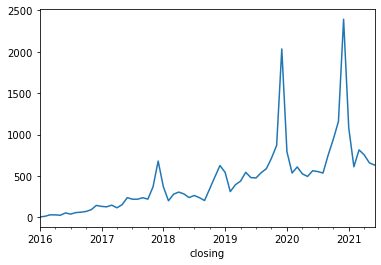

In [26]:
monthly_closing.plot()

In [30]:
monthly_closing.index.tolist()[0]

Timestamp('2016-01-31 00:00:00', freq='M')

In [35]:
monthly_closing.index.strftime('%m/%d/%y').tolist()

['01/31/16',
 '02/29/16',
 '03/31/16',
 '04/30/16',
 '05/31/16',
 '06/30/16',
 '07/31/16',
 '08/31/16',
 '09/30/16',
 '10/31/16',
 '11/30/16',
 '12/31/16',
 '01/31/17',
 '02/28/17',
 '03/31/17',
 '04/30/17',
 '05/31/17',
 '06/30/17',
 '07/31/17',
 '08/31/17',
 '09/30/17',
 '10/31/17',
 '11/30/17',
 '12/31/17',
 '01/31/18',
 '02/28/18',
 '03/31/18',
 '04/30/18',
 '05/31/18',
 '06/30/18',
 '07/31/18',
 '08/31/18',
 '09/30/18',
 '10/31/18',
 '11/30/18',
 '12/31/18',
 '01/31/19',
 '02/28/19',
 '03/31/19',
 '04/30/19',
 '05/31/19',
 '06/30/19',
 '07/31/19',
 '08/31/19',
 '09/30/19',
 '10/31/19',
 '11/30/19',
 '12/31/19',
 '01/31/20',
 '02/29/20',
 '03/31/20',
 '04/30/20',
 '05/31/20',
 '06/30/20',
 '07/31/20',
 '08/31/20',
 '09/30/20',
 '10/31/20',
 '11/30/20',
 '12/31/20',
 '01/31/21',
 '02/28/21',
 '03/31/21',
 '04/30/21',
 '05/31/21',
 '06/30/21']